In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [55]:
Down_traffic = pd.read_parquet("./Data/Down_traffic.parq")
Up_traffic = pd.read_parquet("./Data/Up_traffic.parq")
rsrp = pd.read_parquet("./Data/RSRP_data.parq")
traffic_volume = pd.read_parquet("./Data/Traffic_volume_data.parq")

In [3]:
Down_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               9681 non-null   datetime64[ns]
 1   LocationLatitude        9681 non-null   float64       
 2   LocationLongitude       9681 non-null   float64       
 3   RadioOperatorName       9681 non-null   category      
 4   RadioNetworkGeneration  9681 non-null   category      
 5   RadioConnectionType     9681 non-null   category      
 6   RadioMobileDataEnabled  9681 non-null   category      
 7   DeviceManufacturer      9681 non-null   category      
 8   DeviceName              9681 non-null   category      
 9   TrafficDirection        9681 non-null   category      
 10  TrafficVolume           9681 non-null   float64       
 11  RSRP                    9681 non-null   float64       
dtypes: category(7), datetime64[ns](1), float64(4)
me

In [4]:
Down_traffic.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RadioNetworkGeneration,RadioConnectionType,RadioMobileDataEnabled,DeviceManufacturer,DeviceName,TrafficDirection,TrafficVolume,RSRP
0,2019-11-01 20:00:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Downlink,1.244167,-99.777778
1,2019-11-01 20:15:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Downlink,0.145414,-101.200000
2,2019-11-01 21:00:00,24.526780,46.666590,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A51,Downlink,0.027583,-89.888889
3,2019-11-01 21:00:00,24.549557,46.691914,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy J8,Downlink,164.994614,-69.000000
4,2019-11-01 21:00:00,24.560373,46.865420,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A70,Downlink,22.345335,-111.666667
5,2019-11-01 21:00:00,24.571188,46.637253,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy A20,Downlink,0.319108,-100.250000
6,2019-11-01 21:00:00,24.596653,46.680504,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy Note8,Downlink,75.150810,-83.000000
7,2019-11-01 21:00:00,24.597780,46.633713,Operator A,4G,Mobile,Enabled,HTC,Desire 12,Downlink,19.096824,-88.142857
8,2019-11-01 21:00:00,24.597988,46.723907,Operator A,4G,Mobile,Enabled,HUAWEI,Honor 10I,Downlink,0.030366,-82.000000
9,2019-11-01 21:00:00,24.598774,46.676735,Operator B,4G,Mobile,Enabled,HTC,M9,Downlink,50.598703,-97.400000


In [5]:
Up_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9613 entries, 0 to 9612
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               9613 non-null   datetime64[ns]
 1   LocationLatitude        9613 non-null   float64       
 2   LocationLongitude       9613 non-null   float64       
 3   RadioOperatorName       9613 non-null   category      
 4   RadioNetworkGeneration  9613 non-null   category      
 5   RadioConnectionType     9613 non-null   category      
 6   RadioMobileDataEnabled  9613 non-null   category      
 7   DeviceManufacturer      9613 non-null   category      
 8   DeviceName              9613 non-null   category      
 9   TrafficDirection        9613 non-null   category      
 10  TrafficVolume           9613 non-null   float64       
 11  RSRP                    9613 non-null   float64       
dtypes: category(7), datetime64[ns](1), float64(4)
me

In [6]:
Up_traffic.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RadioNetworkGeneration,RadioConnectionType,RadioMobileDataEnabled,DeviceManufacturer,DeviceName,TrafficDirection,TrafficVolume,RSRP
0,2019-11-01 19:15:00,24.626139,46.689728,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,2.731466,-87.000000
1,2019-11-01 20:00:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,1.175476,-99.777778
2,2019-11-01 20:15:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,0.105763,-101.200000
3,2019-11-01 21:00:00,24.526780,46.666590,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A51,Uplink,0.027508,-89.888889
4,2019-11-01 21:00:00,24.549557,46.691914,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy J8,Uplink,9.920519,-69.000000
5,2019-11-01 21:00:00,24.558767,46.612730,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A50,Uplink,0.100335,-90.538462
6,2019-11-01 21:00:00,24.560373,46.865420,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A70,Uplink,1.569905,-111.666667
7,2019-11-01 21:00:00,24.571188,46.637253,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy A20,Uplink,0.113349,-100.250000
8,2019-11-01 21:00:00,24.596655,46.680653,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy Note8,Uplink,3.188925,-83.000000
9,2019-11-01 21:00:00,24.596676,46.632065,Operator A,4G,Mobile,Enabled,HTC,Desire 12,Uplink,0.382367,-93.500000


# Task 1: Regression

## 1.1 Linear Regression Model

Here, we want to study the impact of the increase of the RSRP value on the traffic volume.
#
I'll choose the operator A to see the impact of the RSRP improvment on the uplink traffice and the downlink traffic. I'll also choose a random polygon.

In [7]:
Down_traffic_poly = sqldf(
"""
SELECT *
FROM Down_traffic
WHERE LocationLongitude BETWEEN 46.8 AND 47
    AND LocationLatitude BETWEEN 24.4 AND 24.6
    AND RadioOperatorName = 'Operator A'
;
""", globals())

Up_traffic_poly = sqldf(
"""
SELECT *
FROM Up_traffic
WHERE LocationLongitude BETWEEN 46.8 AND 47
    AND LocationLatitude BETWEEN 24.4 AND 24.6
    AND RadioOperatorName = 'Operator A'
;
""", globals())

In [8]:
scaler = MinMaxScaler()
Down_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Down_traffic_poly[['RSRP', 'TrafficVolume']])
scaler = MinMaxScaler()
Up_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Up_traffic_poly[['RSRP', 'TrafficVolume']])

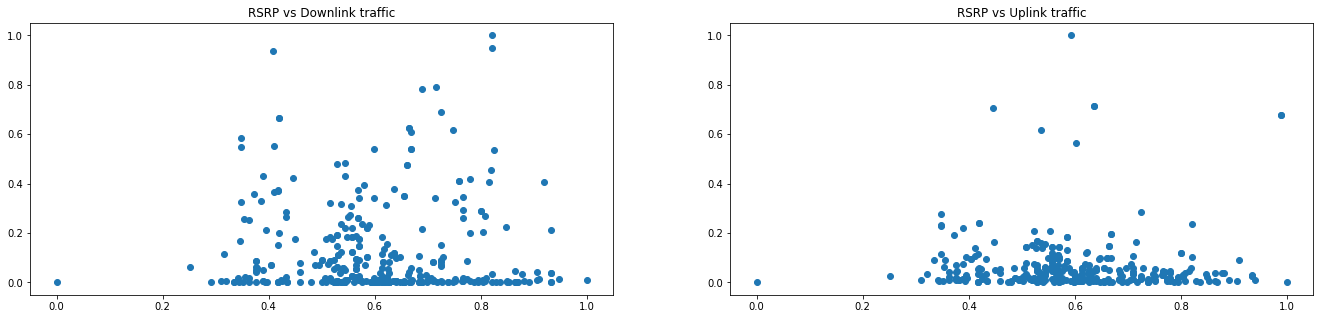

In [9]:
fig,(ax1,ax2) = plt.subplots(1, 2)

ax1.set_title("RSRP vs Downlink traffic")
ax1.scatter(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume)

ax2.set_title("RSRP vs Uplink traffic")
ax2.scatter(Up_traffic_poly.RSRP, Up_traffic_poly.TrafficVolume)

fig.set_figwidth(23)
fig.set_figheight(5) 
plt.show()

In [10]:
Down_traffic_poly.corr(numeric_only=True)

,LocationLatitude,LocationLongitude,TrafficVolume,RSRP
LocationLatitude,1.000000,-0.920562,0.059003,0.147401
LocationLongitude,-0.920562,1.000000,-0.043702,-0.098003
TrafficVolume,0.059003,-0.043702,1.000000,-0.008209
RSRP,0.147401,-0.098003,-0.008209,1.000000


In [11]:
Up_traffic_poly.corr(numeric_only=True)

,LocationLatitude,LocationLongitude,TrafficVolume,RSRP
LocationLatitude,1.000000,-0.928126,0.121372,0.190865
LocationLongitude,-0.928126,1.000000,-0.139009,-0.140298
TrafficVolume,0.121372,-0.139009,1.000000,0.004458
RSRP,0.190865,-0.140298,0.004458,1.000000


From the graph and the correlation matrix we can see that there's very little correlation between these variable. However, let's try a linear regression model and see how it performs then let's try other algorithms.

In [12]:
model = LinearRegression()
X = np.array(Down_traffic_poly["RSRP"]).reshape(-1,1)
y = Down_traffic_poly["TrafficVolume"]
model.fit(X, y)

LinearRegression()

In [13]:
model.score(X, y)

6.738178718657117e-05

As I expected the model performed really badly.
Let's try another model.

# Random Forest Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume, test_size=0.33)

In [15]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [16]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
regr.score(X_test, y_test)

-0.10520609087065713

The model is failling as well.

# Conclusion:
The data we have isn't enough to predict the traffic volume given the RSRP value, more variables should be taken into account. We can see that clearly if we added the latitude and longtitude features.

In [18]:
cols = ["Timestamp",
        "RadioOperatorName",
        "TrafficDirection",
        "RadioNetworkGeneration",
        "RadioConnectionType",
        "RadioMobileDataEnabled",
        "DeviceManufacturer", 
        "DeviceName"
       ]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(Down_traffic_poly.drop(cols ,axis=1), Down_traffic_poly.TrafficVolume, test_size=0.33)

In [20]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
regr.score(X_test, y_test)

0.9875225940116512

This mean that an increase in RSRP value could potentially mean an increase in the Downlink Traffic volume, but only in certain locations. The increase is mainly defined by the location of the user.

# Task 2: Time-Series Analysis

Here, we want to predict the traffic volume growth over time, and compare it ot other competitors.

In [61]:
Down_traffic_samsung = sqldf(
"""
SELECT Timestamp, RadioOperatorName, MAX(TrafficVolume) AS TrafficVolume
FROM Down_traffic
WHERE DeviceManufacturer = 'SAMSUNG'
GROUP BY Timestamp, RadioOperatorName
;
""", globals())
Up_traffic_samsung = sqldf(
"""
SELECT Timestamp, RadioOperatorName, SUM(TrafficVolume) AS TrafficVolume 
FROM Up_traffic
WHERE DeviceManufacturer='SAMSUNG'
GROUP BY Timestamp, RadioOperatorName
;
""", globals())

In [62]:
Down_traffic_samsung.head(10)

,Timestamp,RadioOperatorName,TrafficVolume
0,2019-11-01 20:00:00.000000,Operator C,1.244167
1,2019-11-01 20:15:00.000000,Operator C,0.145414
2,2019-11-01 21:00:00.000000,Operator A,75.150810
3,2019-11-01 21:00:00.000000,Operator B,164.994614
4,2019-11-01 21:00:00.000000,Operator C,6.198008
5,2019-11-01 21:15:00.000000,Operator A,38.276537
6,2019-11-01 21:15:00.000000,Operator B,4.385356
7,2019-11-01 21:15:00.000000,Operator C,2.403918
8,2019-11-01 21:30:00.000000,Operator A,19.906999
9,2019-11-01 21:30:00.000000,Operator B,3.702910


In [63]:
Down_traffic_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          808 non-null    object 
 1   RadioOperatorName  808 non-null    object 
 2   TrafficVolume      808 non-null    float64
dtypes: float64(1), object(2)
memory usage: 19.1+ KB


In [66]:
Up_traffic_samsung.head(10)

,Timestamp,RadioOperatorName,TrafficVolume
0,2019-11-01 19:15:00.000000,Operator C,2.731466
1,2019-11-01 20:00:00.000000,Operator C,1.175476
2,2019-11-01 20:15:00.000000,Operator C,0.105763
3,2019-11-01 21:00:00.000000,Operator A,6.615479
4,2019-11-01 21:00:00.000000,Operator B,25.982257
5,2019-11-01 21:00:00.000000,Operator C,5.103561
6,2019-11-01 21:15:00.000000,Operator A,6.047637
7,2019-11-01 21:15:00.000000,Operator B,1.833374
8,2019-11-01 21:15:00.000000,Operator C,2.578999
9,2019-11-01 21:30:00.000000,Operator A,18.245554


In [65]:
Up_traffic_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          801 non-null    object 
 1   RadioOperatorName  801 non-null    object 
 2   TrafficVolume      801 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.9+ KB


In [68]:
Down_traffic_samsung["RadioOperatorName"] = Down_traffic_samsung["RadioOperatorName"].astype('category')
Up_traffic_samsung["RadioOperatorName"] = Up_traffic_samsung["RadioOperatorName"].astype('category')

Down_traffic_samsung["Timestamp"] = pd.to_datetime(Down_traffic_samsung["Timestamp"])
Up_traffic_samsung["Timestamp"] = pd.to_datetime(Up_traffic_samsung["Timestamp"])

In [70]:
Down_traffic_samsung.info()
Up_traffic_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          808 non-null    datetime64[ns]
 1   RadioOperatorName  808 non-null    category      
 2   TrafficVolume      808 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 13.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          801 non-null    datetime64[ns]
 1   RadioOperatorName  801 non-null    category      
 2   TrafficVolume      801 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 13.6 KB


In [80]:
Down_traffic_samsung_A = Down_traffic_samsung[Down_traffic_samsung["RadioOperatorName"] == "Operator A"].copy() 
Down_traffic_samsung_B = Down_traffic_samsung[Down_traffic_samsung["RadioOperatorName"] == "Operator B"].copy()
Down_traffic_samsung_C = Down_traffic_samsung[Down_traffic_samsung["RadioOperatorName"] == "Operator C"].copy()

Up_traffic_samsung_A = Up_traffic_samsung[Up_traffic_samsung["RadioOperatorName"] == "Operator A"].copy() 
Up_traffic_samsung_B = Up_traffic_samsung[Up_traffic_samsung["RadioOperatorName"] == "Operator B"].copy()
Up_traffic_samsung_C = Up_traffic_samsung[Up_traffic_samsung["RadioOperatorName"] == "Operator C"].copy()

In [85]:
Up_traffic_samsung_B

,Timestamp,RadioOperatorName,TrafficVolume
4,2019-11-01 21:00:00,Operator B,25.982257
7,2019-11-01 21:15:00,Operator B,1.833374
10,2019-11-01 21:30:00,Operator B,2.774729
13,2019-11-01 21:45:00,Operator B,17.819621
16,2019-11-01 22:00:00,Operator B,7.135538
...,...,...,...
787,2019-11-04 19:45:00,Operator B,8448.600129
790,2019-11-04 20:00:00,Operator B,57.383831
793,2019-11-04 20:15:00,Operator B,10.034245
796,2019-11-04 20:30:00,Operator B,1.676744


[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


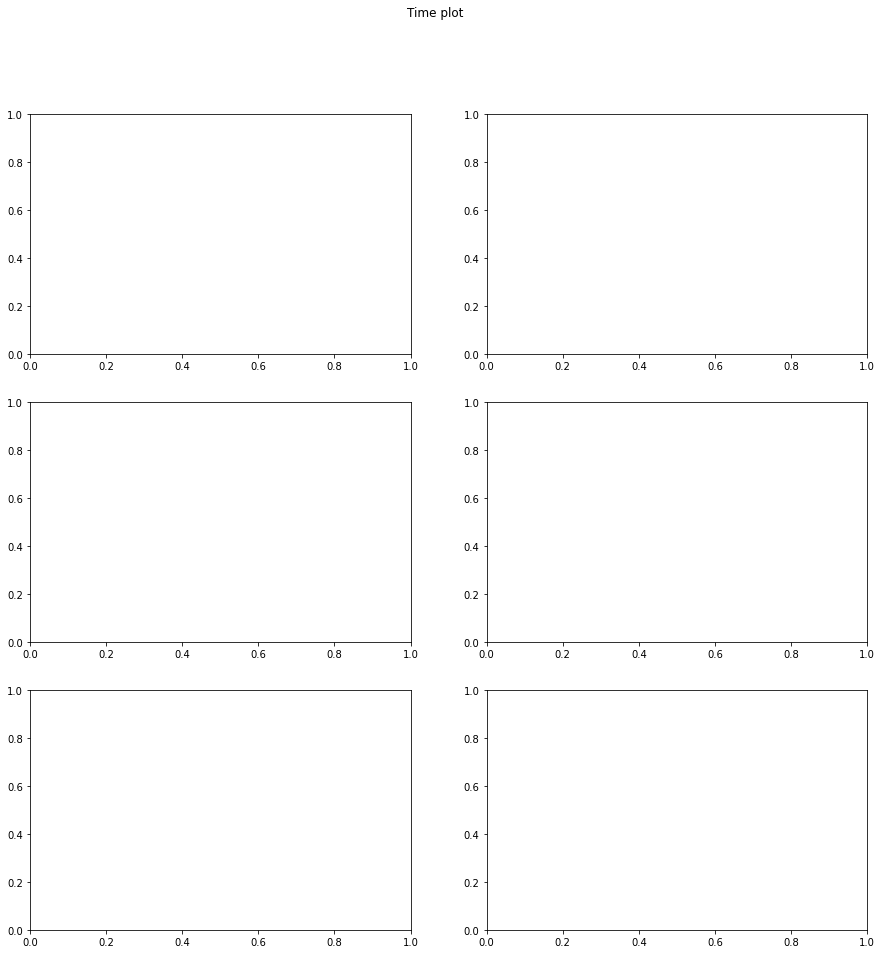

In [87]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Time plot')

print(axs)
# axs[0][0].set_title('Downlink - A')
# axs[0][1].set_title('Upnlink - A')
# axs[1][0].set_title('Downlink - B')
# axs[1][1].set_title('Uplink - B')
# axs[2][0].set_title('Downlink - C')
# axs[2][1].set_title('Uplink - C')

# axs[0][0].plot(Down_traffic_samsung_A)
# axs[0][1].plot(Up_traffic_samsung_A)
# axs[1][0].plot(Down_traffic_samsung_B)
# axs[1][1].plot(Up_traffic_samsung_B)
# axs[2][0].plot(Down_traffic_samsung_C)
# axs[2][1].plot(Up_traffic_samsung_C)
